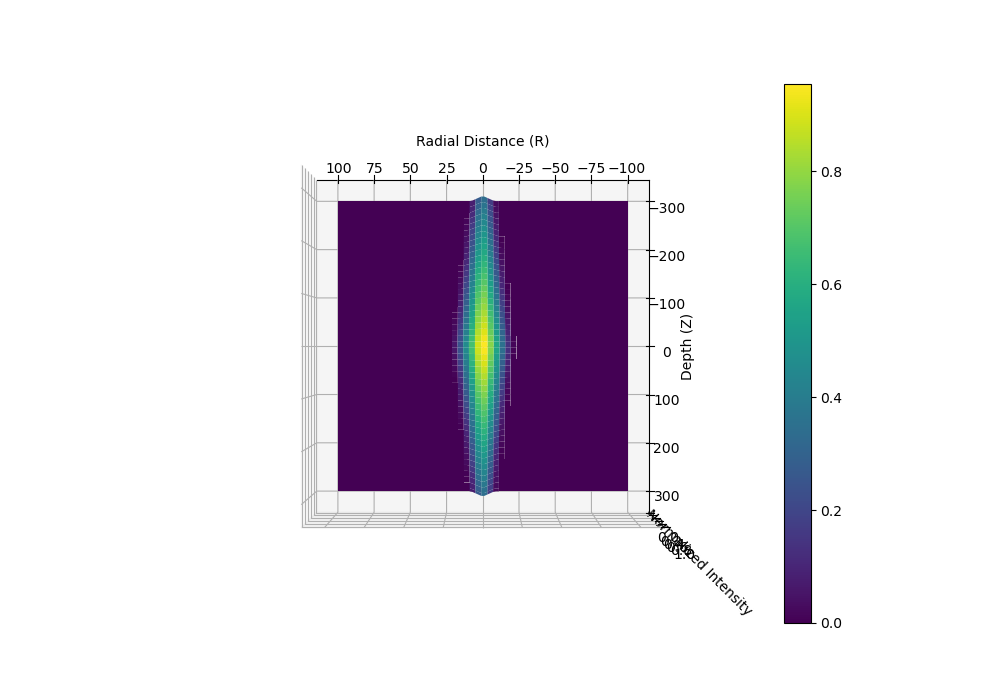

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib widget

save_path = '../../V1-Slice/Model-Parameters/opto_input/fake_intensity_data.npy'

# Define the radial distance (R) and depth (Z)
r_max = 100
z_max = 300
num_points_r = 100
num_points_z = 100

# Create a meshgrid for radial distance and depth in the range [-100, 100]
R, Z = np.meshgrid(np.linspace(-r_max, r_max, num_points_r), np.linspace(-z_max, z_max, num_points_z))

# Define constants for the intensity decay
k_r = 5  # Radial decay rate
k_z_pos = 0.2  # Depth decay rate for Z > 0 
k_z_neg = 0.2  # Depth decay rate for Z < 0 

# Calculate the radial component of the decay
radial_decay = k_r * np.sqrt(R**2)

# Calculate depth decay based on whether Z is positive or negative
depth_decay = np.zeros_like(Z)
depth_decay[Z > 0] = k_z_pos * Z[Z > 0]  # Faster decay for positive depths
depth_decay[Z < 0] = -k_z_neg * Z[Z < 0]  # Slower decay for negative depths

# Define the intensity function with the corrected decay terms
Intensity = 100 - radial_decay - depth_decay

# Make sure intensity doesn't go below 0
Intensity = np.maximum(Intensity, 0)

# Normalize the intensity (scale between 0 and 1)
Intensity = Intensity / np.max(Intensity)

# Plot the 3D surface
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface with radial distance (R), depth (Z), and normalized intensity
surf = ax.plot_surface(R, Z, Intensity, cmap='viridis', edgecolor='none')

# Add labels
ax.set_xlabel('Radial Distance (R)')
ax.set_ylabel('Depth (Z)')
ax.set_zlabel('Normalized Intensity')

# Adjust the view angle for better perspective
ax.view_init(elev=90, azim=90)

# Add gridlines to the plot
ax.grid(True)

# Add a color bar to indicate intensity scale
fig.colorbar(surf)

# Show the plot
plt.show()

In [2]:
# Save the data as a .npy file
np.save(save_path, {'R': R, 'Z': Z, 'Intensity': Intensity})
